In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
%matplotlib inline

In [4]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.drop('Gender',1,inplace=True)

In [25]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.001)
model.fit(df)

OneClassSVM(gamma=0.001, nu=0.001)

In [26]:
# prediction
y_pred = model.predict(df)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
# filter outlier index
outlier_index = np.where(y_pred == -1) 
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,Height,Weight
86,66.596197,208.345694
1243,62.063836,175.071171
1317,78.462053,227.342565
1610,76.617546,255.863326
1671,70.059331,225.014368
2014,78.998742,269.989699
4826,73.504259,188.875894
5016,70.128653,151.254270
5434,59.252725,139.140812
9285,54.263133,64.700127


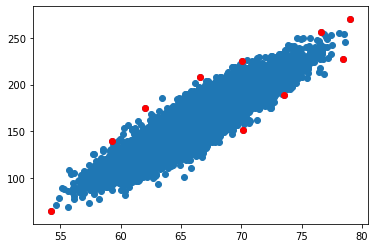

In [30]:
# visualize outputs
plt.scatter(df["Height"], df["Weight"])
plt.scatter(outlier_values["Height"], outlier_values["Weight"], c = "r")

In [50]:
df = pd.read_csv('Housing_price.csv')
df.drop(['location','size'],1,inplace=True)
df.head()

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699
1,2600.0,5.0,120.00,4,4615
2,1440.0,2.0,62.00,3,4305
3,1521.0,3.0,95.00,3,6245
4,1200.0,2.0,51.00,2,4250


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df1 = scaler.fit_transform(df)
df2 = pd.DataFrame(df1, columns = df.columns)

In [64]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.001)
model.fit(df2)

OneClassSVM(gamma=0.001, nu=0.001)

In [65]:
outlier_values

,total_sqft,bath,price,bhk,price_per_sqft
1867,1.000000,0.025641,0.036748,0.047619,0.000000
4044,0.000000,0.076923,0.031180,0.071429,1.000000
10972,0.159170,0.102564,0.808463,0.071429,0.002894
12948,0.136768,0.307692,1.000000,0.214286,0.004174


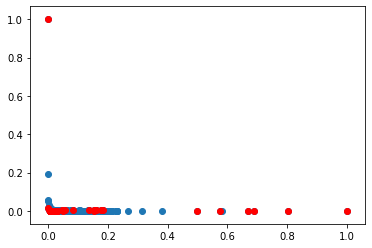

In [66]:
y_pred = model.predict(df2)
# filter outlier index
outlier_index = np.where(y_pred == -1) 
# filter outlier values
outlier_values = df2.iloc[outlier_index]
# visualize outputs
plt.scatter(df2["total_sqft"], df2["price_per_sqft"])
plt.scatter(outlier_values["total_sqft"], outlier_values["price_per_sqft"], c = "r")